<a href="https://colab.research.google.com/github/Jins-B/first-repo/blob/main/ANN%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score


In [5]:
email = pd.read_csv('drive/MyDrive/spam.csv')
email.head(15)

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [6]:
len(email)

5572

In [7]:
email.isna().sum()

Label        0
EmailText    0
dtype: int64

In [8]:
email.shape

(5572, 2)

In [9]:
email.tail()

,Label,EmailText
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


# Preprocessing

In [10]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, len(email)):
  e_mail = re.sub('[^a-zA-Z]', ' ', email['EmailText'][i])
  e_mail = e_mail.split()
  ps = PorterStemmer()
  e_mail = [ps.stem(word) for word in e_mail if not word in set(stopwords.words('english'))]
  e_mail = ' '.join(e_mail)
  corpus.append(e_mail)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
corpus[5]

'freemsg hey darl week word back i like fun still tb ok xxx std chg send rcv'

In [12]:
X2 = email['EmailText'].values
y2 = email['Label'].values

print(X2)
print(y2)

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name']
['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [13]:
len(X2)

5572

In [14]:
len(y2)

5572

# Splitting into training and testing data

In [15]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.20, random_state = 0)

# Vectorization

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()  
X2_train = cv.fit_transform(X2_train)
X2_test = cv.transform(X2_test)

In [17]:
print(X2_train)

  (0, 4711)	2
  (0, 6732)	1
  (0, 3689)	2
  (0, 3827)	1
  (0, 3422)	2
  (0, 3203)	1
  (0, 906)	1
  (0, 6881)	1
  (0, 2465)	1
  (1, 898)	1
  (1, 3582)	2
  (1, 2605)	1
  (1, 6698)	1
  (1, 4761)	1
  (1, 3123)	1
  (1, 6814)	1
  (1, 7269)	1
  (1, 3839)	1
  (1, 2775)	1
  (1, 4429)	1
  (2, 3689)	1
  (2, 7289)	1
  (2, 7233)	1
  (2, 2973)	1
  (2, 4587)	1
  :	:
  (4454, 5827)	1
  (4454, 3819)	1
  (4454, 2301)	1
  (4454, 4914)	1
  (4454, 7235)	1
  (4455, 7552)	1
  (4455, 7579)	1
  (4455, 3302)	1
  (4455, 4045)	1
  (4455, 2277)	1
  (4455, 4120)	1
  (4455, 5713)	1
  (4455, 4187)	1
  (4455, 6335)	1
  (4456, 6814)	2
  (4456, 7579)	3
  (4456, 3466)	1
  (4456, 6639)	1
  (4456, 814)	1
  (4456, 6581)	1
  (4456, 7457)	2
  (4456, 961)	1
  (4456, 3324)	1
  (4456, 2141)	1
  (4456, 6436)	1


In [18]:
print(X2_test)

  (0, 842)	1
  (0, 1880)	1
  (0, 3815)	1
  (0, 3962)	1
  (0, 5152)	1
  (0, 6019)	1
  (0, 6814)	1
  (0, 6847)	1
  (0, 7063)	1
  (1, 2733)	1
  (1, 4870)	1
  (1, 6696)	1
  (1, 7261)	1
  (2, 890)	1
  (2, 924)	1
  (2, 983)	1
  (2, 1010)	1
  (2, 1956)	1
  (2, 1996)	1
  (2, 2350)	2
  (2, 2675)	1
  (2, 2775)	1
  (2, 2894)	1
  (2, 3242)	1
  (2, 3357)	1
  :	:
  (1114, 402)	1
  (1114, 890)	1
  (1114, 924)	1
  (1114, 1540)	1
  (1114, 1897)	1
  (1114, 3068)	1
  (1114, 3072)	1
  (1114, 3302)	1
  (1114, 3689)	2
  (1114, 3700)	1
  (1114, 3927)	1
  (1114, 4329)	1
  (1114, 4916)	1
  (1114, 5992)	1
  (1114, 6432)	1
  (1114, 6576)	2
  (1114, 6690)	1
  (1114, 6696)	2
  (1114, 6814)	3
  (1114, 7284)	1
  (1114, 7309)	1
  (1114, 7355)	1
  (1114, 7365)	2
  (1114, 7579)	1
  (1114, 7584)	1


# SVC and SVM

---



In [19]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 10)
classifier.fit(X2_train, y2_train)
print(classifier.score(X2_test,y2_test))

0.9766816143497757


In [20]:
y2_SVC_pred = classifier.predict(X2_test)
y2_SVC_pred 

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [21]:
from sklearn.metrics import confusion_matrix
SVC_cm = confusion_matrix(y2_test, y2_SVC_pred)
print(SVC_cm)

[[949   0]
 [ 26 140]]


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
tuned_parameters = {'kernel': ['rbf','linear'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}
model = GridSearchCV(svm.SVC(), tuned_parameters)
model.fit(X2_train,y2_train)
print(model.score(X2_test,y2_test))



0.979372197309417


In [23]:
y2_SVM_pred = model.predict(X2_test)
y2_SVM_pred 

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [24]:
from sklearn.metrics import confusion_matrix
SVM_cm = confusion_matrix(y2_test, y2_SVM_pred)
print(SVM_cm)

[[946   3]
 [ 20 146]]


In [25]:
X = cv.fit_transform(corpus).toarray()
y = email['Label']

# Naïve Bayes

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [27]:
from sklearn.naive_bayes import GaussianNB
GN_classifier = GaussianNB()

GN_classifier.fit(X_train, y_train)




GaussianNB()

In [28]:
GN_score = GN_classifier.score(X_test,y_test)
GN_score

0.862780269058296

In [29]:
y_GN_pred = GN_classifier.predict(X_test)
y_GN_pred 

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [30]:
from sklearn.metrics import confusion_matrix
GN_cm = confusion_matrix(y_test, y_GN_pred)
print(GN_cm)

[[821 128]
 [ 25 141]]


In [31]:


from sklearn.naive_bayes import MultinomialNB
MN_classifier = MultinomialNB()
MN_classifier.fit(X_train, y_train)

MultinomialNB()

In [32]:
MN_score = MN_classifier.score(X_test,y_test)
MN_score

0.97847533632287

In [33]:
y_MN_pred = MN_classifier.predict(X_test)
y_MN_pred 

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [34]:
MN_cm = confusion_matrix(y_test, y_MN_pred)
print(MN_cm)

[[932  17]
 [  7 159]]


# Decision tree and Random forest

In [40]:
from sklearn.tree import DecisionTreeClassifier 

model_tree=DecisionTreeClassifier()

model_tree.fit(X_train,y_train)

y_DT_pred=model_tree.predict(X_test)
y_DT_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [39]:
DT_score = model_tree.score(X_test,y_test)
DT_score

0.9811659192825112

In [43]:
DT_cm = confusion_matrix(y_test, y_DT_pred)
print(DT_cm)

[[945   4]
 [ 19 147]]


In [63]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=20,criterion='entropy')
model_rf.fit(X_train,y_train)

y_RF_pred=model_rf.predict(X_test)
y_RF_pred


array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [64]:
RF_score = model_rf.score(X_test,y_test)
RF_score

0.9730941704035875

In [65]:
RF_cm = confusion_matrix(y_test, y_RF_pred)
print(RF_cm)

[[949   0]
 [ 30 136]]


# Confusion matrices

In [38]:
def model_assessment(y_test,predicted_class):
    print('accuracy')
    print(accuracy_score(y_test,predicted_class))
    print('precision')
    print(precision_score(y_test,predicted_class,pos_label='spam'))
    print('recall')
    print(recall_score(y_test,predicted_class,pos_label='spam'))
    print('f-Score')
    print(f1_score(y_test,predicted_class,pos_label='spam'))
    print('AUC')
    print(roc_auc_score(np.where(y_test=='spam',1,0),np.where(predicted_class=='spam',1,0)))
  




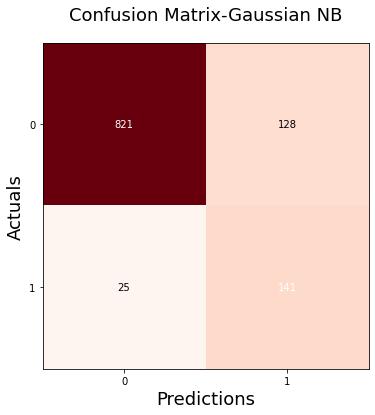

accuracy
0.862780269058296
precision
0.5241635687732342
recall
0.8493975903614458
f-Score
0.6482758620689655
AUC
0.8572593852755594


In [44]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=GN_cm, figsize=(6, 6), cmap=plt.cm.Reds)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix-Gaussian NB', fontsize=18)
plt.show()

model_assessment(y_test, y_GN_pred)    

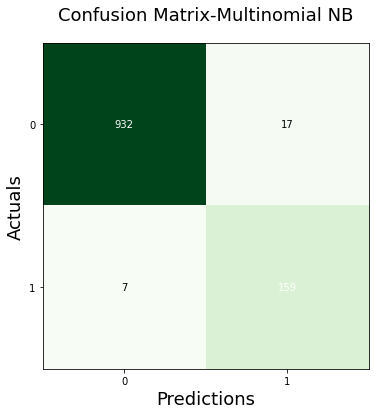

accuracy
0.97847533632287
precision
0.9034090909090909
recall
0.9578313253012049
f-Score
0.9298245614035089
AUC
0.9699588660225729


In [45]:
 fig,bx = plot_confusion_matrix(conf_mat=MN_cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix-Multinomial NB', fontsize=18)
plt.show()
model_assessment(y_test, y_MN_pred) 

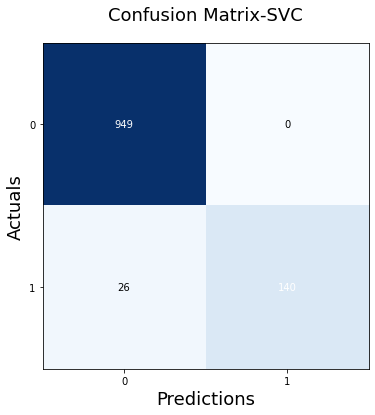

accuracy
0.9766816143497757
precision
1.0
recall
0.8433734939759037
f-Score
0.9150326797385622
AUC
0.9216867469879518


In [46]:
 fig,cx = plot_confusion_matrix(conf_mat=SVC_cm, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix-SVC', fontsize=18)
plt.show()
model_assessment(y2_test, y2_SVC_pred) 

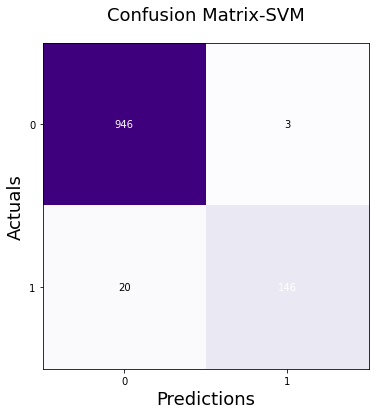

accuracy
0.979372197309417
precision
0.9798657718120806
recall
0.8795180722891566
f-Score
0.926984126984127
AUC
0.938178424974926


In [47]:
 fig,dx = plot_confusion_matrix(conf_mat=SVM_cm, figsize=(6, 6), cmap=plt.cm.Purples)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix-SVM', fontsize=18)
plt.show()
model_assessment(y2_test, y2_SVM_pred) 

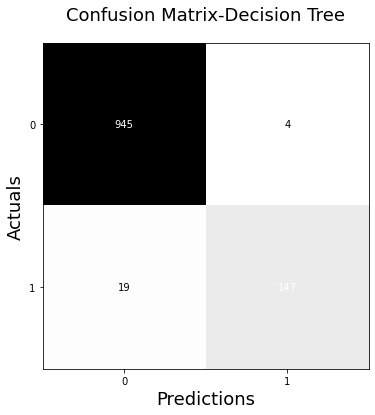

accuracy
0.979372197309417
precision
0.9735099337748344
recall
0.8855421686746988
f-Score
0.9274447949526813
AUC
0.940663602777813


In [66]:
fig,ex = plot_confusion_matrix(conf_mat=DT_cm, figsize=(6, 6), cmap=plt.cm.Greys)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix-Decision Tree', fontsize=18)
plt.show()
model_assessment(y_test, y_DT_pred) 

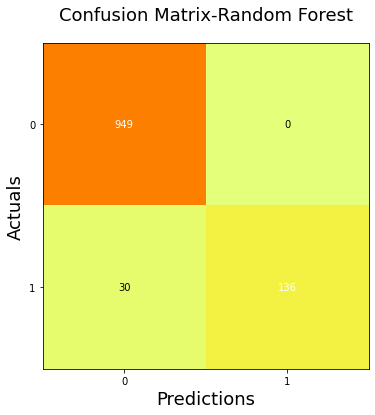

accuracy
0.9730941704035875
precision
1.0
recall
0.8192771084337349
f-Score
0.9006622516556291
AUC
0.9096385542168675


In [76]:
fig,ex = plot_confusion_matrix(conf_mat=RF_cm, figsize=(6, 6), cmap=plt.cm.Wistia)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix-Random Forest', fontsize=18)
plt.show()
model_assessment(y_test, y_RF_pred) 

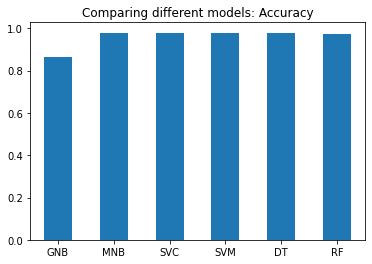

In [79]:
models = pd.DataFrame({"GNB": GN_score,
                           "MNB": MN_score,
                       "SVC" : classifier.score(X2_test,y2_test),
                       "SVM" :model.score(X2_test,y2_test),
                       "DT" : model_tree.score(X_test,y_test),
                       "RF" : model_rf.score(X_test,y_test)
                           },
                          index=[0])


models.T.plot.bar(title="Comparing different models: Accuracy",
                      legend=False)
plt.xticks(rotation=0);

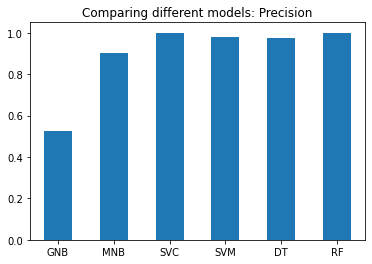

In [80]:
models = pd.DataFrame({"GNB": precision_score(y_test, y_GN_pred,pos_label='spam'),
                           "MNB": precision_score(y_test,y_MN_pred,pos_label='spam'),
                       "SVC" : precision_score(y2_test, y2_SVC_pred,pos_label='spam'),
                       "SVM" :precision_score(y2_test, y2_SVM_pred,pos_label='spam'),
                       "DT" : precision_score(y_test, y_DT_pred,pos_label='spam') ,
                       "RF" : precision_score(y_test, y_RF_pred,pos_label='spam') 
                           },
                          index=[0])


models.T.plot.bar(title="Comparing different models: Precision",
                      legend=False)
plt.xticks(rotation=0);

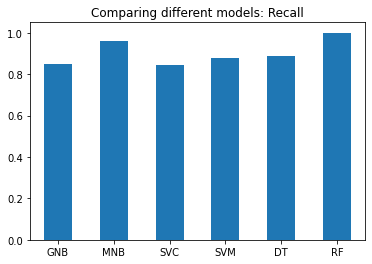

In [81]:
models = pd.DataFrame({"GNB": recall_score(y_test, y_GN_pred,pos_label='spam'),
                           "MNB": recall_score(y_test,y_MN_pred,pos_label='spam'),
                       "SVC" : recall_score(y2_test, y2_SVC_pred,pos_label='spam'),
                       "SVM" :recall_score(y2_test, y2_SVM_pred,pos_label='spam'),
                       "DT" : recall_score(y_test, y_DT_pred,pos_label='spam') ,
                       "RF" : precision_score(y_test, y_RF_pred,pos_label='spam') 
                           },
                          index=[0])


models.T.plot.bar(title="Comparing different models: Recall",
                      legend=False)
plt.xticks(rotation=0);

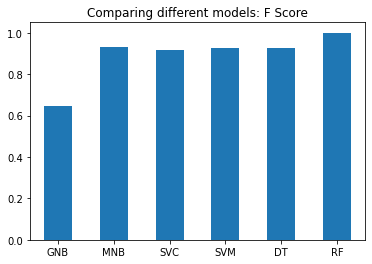

In [82]:
models = pd.DataFrame({"GNB": f1_score(y_test, y_GN_pred,pos_label='spam'),
                           "MNB": f1_score(y_test,y_MN_pred,pos_label='spam'),
                       "SVC" : f1_score(y2_test, y2_SVC_pred,pos_label='spam'),
                       "SVM" :f1_score(y2_test, y2_SVM_pred,pos_label='spam'),
                       "DT" : f1_score(y_test, y_DT_pred,pos_label='spam') ,
                       "RF" : precision_score(y_test, y_RF_pred,pos_label='spam') 
                           },
                          index=[0])


models.T.plot.bar(title="Comparing different models: F Score",
                      legend=False)
plt.xticks(rotation=0);

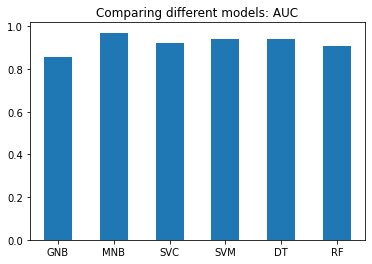

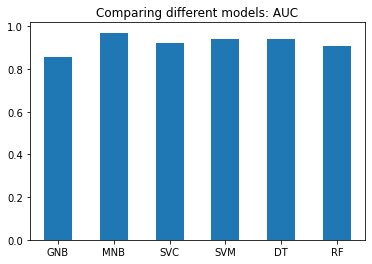

In [84]:
models = pd.DataFrame({"GNB": roc_auc_score(np.where(y_test=='spam',1,0),np.where(y_GN_pred=='spam',1,0)),
                           "MNB":roc_auc_score(np.where(y_test=='spam',1,0),np.where(y_MN_pred=='spam',1,0)),
                       "SVC" :roc_auc_score(np.where(y_test=='spam',1,0),np.where(y2_SVC_pred=='spam',1,0)),
                       "SVM" :roc_auc_score(np.where(y_test=='spam',1,0),np.where(y2_SVM_pred=='spam',1,0)),
                       "DT" :roc_auc_score(np.where(y_test=='spam',1,0),np.where(y_DT_pred=='spam',1,0)),
                       "RF" :roc_auc_score(np.where(y_test=='spam',1,0),np.where(y_RF_pred=='spam',1,0))
                           },
                          index=[0])


models.T.plot.bar(title="Comparing different models: AUC",
                      legend=False)
plt.xticks(rotation=0);